In [3]:
import pandas as pd
import numpy as np 
import csv

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as sms
import scipy.stats as stats

from math import sqrt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

## Question 3

### What vehicle defect is most common in reported crashes in the Chicago area?

In [4]:
df = pd.read_csv(r'data\Sample3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226982 entries, 0 to 226981
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     226982 non-null  int64  
 1   CRASH_DATE_x                   226982 non-null  int64  
 2   UNIT_TYPE                      226982 non-null  object 
 3   MAKE                           226982 non-null  object 
 4   MODEL                          226982 non-null  object 
 5   VEHICLE_DEFECT                 226982 non-null  object 
 6   VEHICLE_TYPE                   226982 non-null  object 
 7   VEHICLE_USE                    226982 non-null  object 
 8   MANEUVER                       226982 non-null  object 
 9   OCCUPANT_CNT                   226982 non-null  float64
 10  CRASH_DATE_y                   226982 non-null  object 
 11  POSTED_SPEED_LIMIT             226982 non-null  int64  
 12  TRAFFIC_CONTROL_DEVICE        

In [19]:
df_defect=df.groupby(df['VEHICLE_DEFECT']).count().sort_values(by='CRASH_DATE_x', ascending=False).drop(index='NONE').reset_index()

In [20]:
df_defect

,VEHICLE_DEFECT,Unnamed: 0,CRASH_DATE_x,UNIT_TYPE,MAKE,MODEL,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,OCCUPANT_CNT,...,LATITUDE,LONGITUDE,PERSON_ID,PERSON_TYPE,CRASH_DATE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION
0,BRAKES,1394,1394,1394,1394,1394,1394,1394,1394,1394,...,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
1,STEERING,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
2,TIRES,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
3,WHEELS,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
4,ENGINE/MOTOR,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
5,SUSPENSION,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
6,LIGHTS,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
7,WINDOWS,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
8,FUEL SYSTEM,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
9,SIGNALS,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


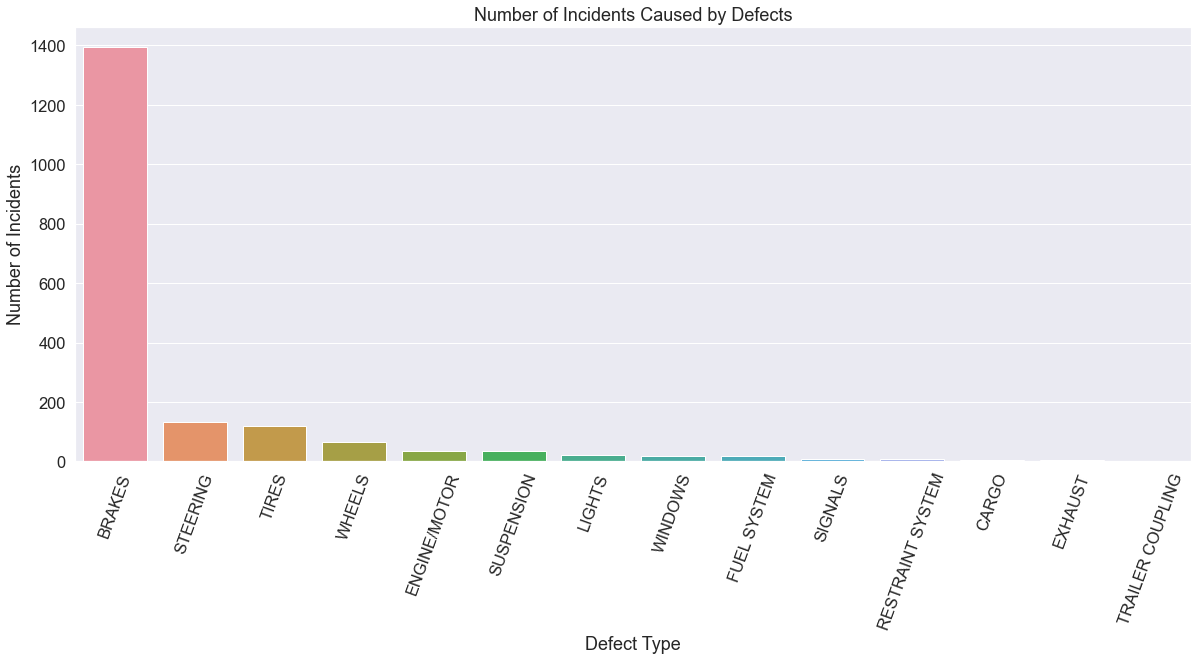

In [23]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=df_defect['VEHICLE_DEFECT'], y=df_defect['CRASH_DATE_x'])
ax.set(xlabel="Defect Type", ylabel="Number of Incidents")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Number of Incidents Caused by Defects')
plt.show()

## Question 3 Insights
#### There is no vehicle defect for the majority of accidents in the Chicago Area. However, when a vehicle defect is listed, the majority of accidents are caused by malfunctioning brakes. Brake inspections for state registrations could be more demanding of individuals' vehicles.
